 # PERFORM DATA CLEANING 

## IMPORTING PYTHON LIBRARIES

In [5]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sb
from scipy.stats import norm
from scipy import stats


## IMPORT DATASET

In [7]:
# load the titanic dataset file
pd_data = pd.read_csv('titanic.csv')

In [9]:
# To know the dataset shape.
pd_data.shape

(891, 12)

In [12]:
# Displaying the head of dataset
pd_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Displaying the last row of the dataset
pd_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# Descride the dataset
pd_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Displaying the dataframe index.
pd_data.index

RangeIndex(start=0, stop=891, step=1)

In [19]:
# Displaying the unique values of dataset.
pd_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##  Identifying Missing Values In The Dataset

In [22]:
pd_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# Displaying Character of column in dataset
pd_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



## Identify Missing values



In [30]:
# Displaying missing values in each column
pd_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing "Age" Values 

In [34]:
mean_age = pd_data['Age'].mean()
pd_data['Age'].fillna(mean_age,inplace=True)

### Handling Missing "Cabin" Values

In [40]:
pd_data['Cabin'].fillna('Unknow',inplace=True)    

### Handling Missing "Embarked" Values


In [55]:
mode_embarked = pd_data['Embarked'].mode().iloc[0]
pd_data['Embarked'].fillna('mode_embarked',inplace=True)

In [58]:
pd_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Removing Duplicates

In [62]:
pd_data.drop_duplicates(inplace=True)

## Identifying Outliers

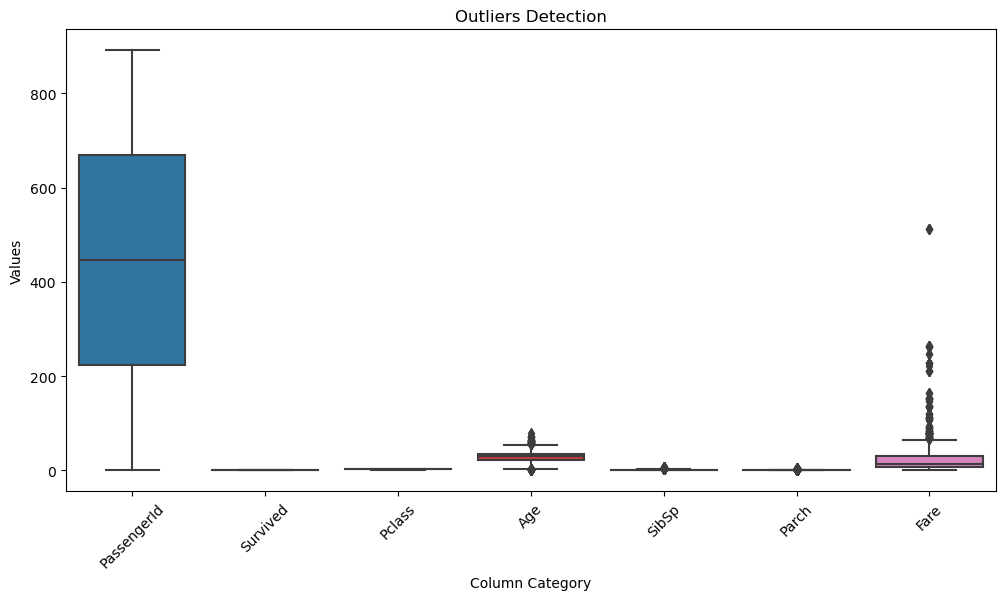

In [70]:
# Selecting numerical columns
num_columns = pd_data.select_dtypes(include=['int64', 'float64']).columns

# Creating a box plot to visualize outliers in numerical columns
plt.figure(figsize=(12, 6))
sb.boxplot(data=pd_data[num_columns])
plt.xticks(rotation=45)
plt.title("Outliers Detection")
plt.xlabel("Column Category")
plt.ylabel("Values")
plt.show()

## Removing Outliers Data

In [71]:
# Function to remove outliers based on IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'Age' and 'Fare' columns
pd_data_no_outliers = remove_outliers(pd_data, 'Age')
pd_data_no_outliers = remove_outliers(pd_data_no_outliers, 'Fare')

# Displaying the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", pd_data_no_outliers.shape) 

Shape of DataFrame after removing outliers: (718, 12)


## Cleaning Data After Removing Missing Values

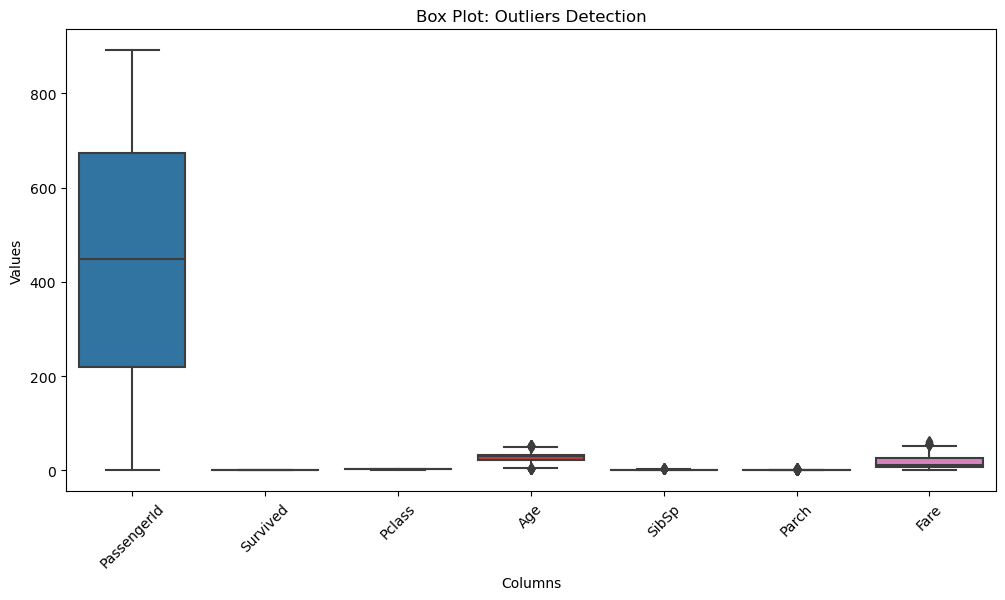

In [73]:
num_columns = pd_data.select_dtypes(include=['int64', 'float64']).columns

# Creating a box plot to visualize outliers in numerical columns
plt.figure(figsize=(12, 6))
sb.boxplot(data=pd_data_no_outliers[num_columns])
plt.xticks(rotation=45)
plt.title("Box Plot: Outliers Detection")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()